In [1]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import pandas as pd
file = Path('../Resources/wholesale_customers.csv')

In [3]:
df = pd.read_csv(file)

In [4]:
df.sample(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
217,1,1,18044,1475,2046,2532,130,1158
218,2,1,18,7504,15205,1285,4797,6372
118,1,3,20049,1891,2362,5343,411,933
231,1,1,2344,10678,3828,1439,1566,490
311,1,2,29635,2335,8280,3046,371,117
292,1,3,2838,3086,4329,3838,825,1060
139,1,3,5387,4979,3343,825,637,929
13,2,3,21217,6208,14982,3095,6707,602
148,1,3,5924,584,542,4052,283,434
156,2,3,3830,5291,14855,317,6694,3182


In [5]:
# Normalize the data
normalized = normalize(df)

In [6]:
normalized[:3]

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, 5.39873747e-01,
        4.22740825e-01, 1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, 6.14703821e-01,
        5.99539873e-01, 1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, 5.49791784e-01,
        4.79632161e-01, 1.50119124e-01, 2.19467293e-01, 4.89619296e-01]])

In [7]:
# Create a new dataframe with the normalized data
df2 = pd.DataFrame(normalized)

In [8]:
df2.head()

,0,1,2,3,4,5,6,7
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [9]:
# Copy column names over to new data frame
df2.columns = df.columns

In [10]:
df2.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


In [11]:
# Perform hierarchical clustering
mergings = linkage(normalized, method='ward')

In [12]:
mergings[:5]

array([[8.30000000e+01, 2.82000000e+02, 1.53464710e-02, 2.00000000e+00],
       [1.50000000e+02, 3.36000000e+02, 1.80052884e-02, 2.00000000e+00],
       [2.58000000e+02, 2.73000000e+02, 1.99150754e-02, 2.00000000e+00],
       [1.14000000e+02, 2.17000000e+02, 2.23826721e-02, 2.00000000e+00],
       [2.20000000e+02, 2.39000000e+02, 2.25276653e-02, 2.00000000e+00]])

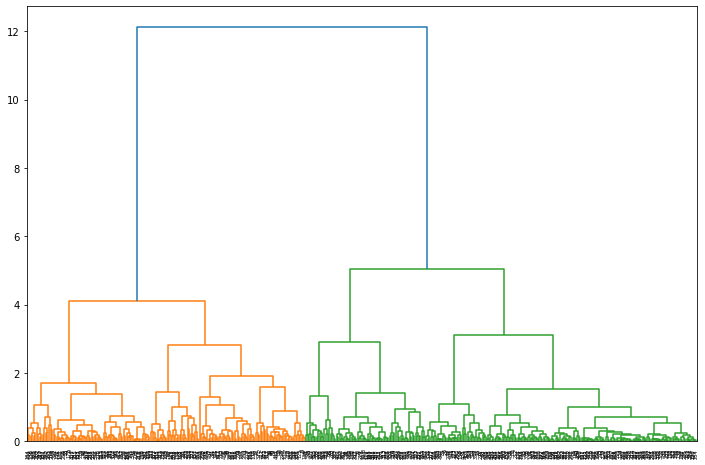

In [13]:
# Generate a dendrogram
plt.figure(figsize=(12,8))

dendrogram(mergings,
          leaf_rotation=90,
          leaf_font_size=5)

plt.show()

In [14]:
# Generate cluster labels with sklearn.cluster's AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,
                                 affinity='euclidean',
                                 linkage='ward')
labels = cluster.fit_predict(df2)

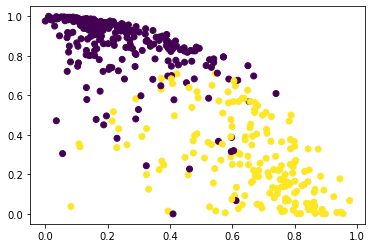

In [15]:
# Create a scatter plot with two of the features
plt.scatter(df2['Grocery'], df2['Fresh'], c=labels)
plt.show()

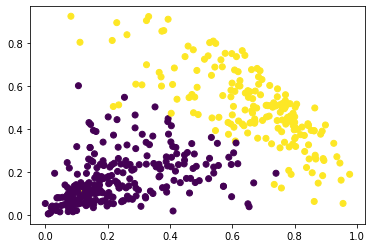

In [16]:
plt.scatter(df2['Grocery'], df2['Milk'], c=labels)
plt.show()

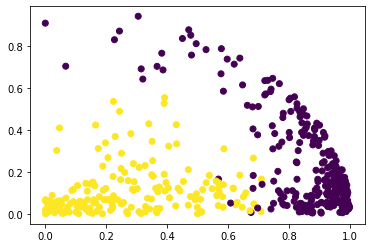

In [17]:
plt.scatter(df2['Fresh'], df2['Frozen'], c=labels)
plt.show()

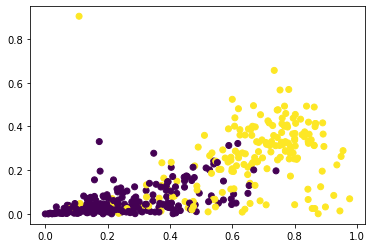

In [18]:
plt.scatter(df2['Grocery'], df2['Detergents_Paper'], c=labels)
plt.show()